In [31]:
#imports
from mpl_toolkits import mplot3d
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import copy

In [32]:
#input_csv
df_inp = pd.read_csv('linearX.csv', header=None)
print(df_inp)

# normalizing data
np_norm = df_inp.to_numpy()
va = np_norm.var()
st_dev = math.sqrt(va)
m = np_norm.mean()
np_norm = np_norm - m
np_norm = np_norm/st_dev
m = np.size(np_norm,0)
print(np_norm)
print(m)
#print(np_norm.var())


       0
0    9.1
1    8.0
2    9.1
3    8.4
4    6.9
..   ...
95   7.8
96  10.2
97   6.1
98   7.3
99   7.3

[100 rows x 1 columns]
[[ 0.60239429]
 [-0.03598116]
 [ 0.60239429]
 [ 0.19615537]
 [-0.67435661]
 [-0.21008356]
 [ 4.37461286]
 [-0.44222008]
 [-0.61632248]
 [-0.50025422]
 [ 1.18273561]
 [ 1.99521345]
 [-0.55828835]
 [ 1.12470147]
 [ 0.48632602]
 [-0.09401529]
 [-1.42880033]
 [-1.0225614 ]
 [-0.79042488]
 [ 1.356838  ]
 [ 0.2541895 ]
 [-0.38418595]
 [-1.0225614 ]
 [-1.54486859]
 [ 0.48632602]
 [ 0.77649668]
 [-0.32615182]
 [ 2.22734998]
 [-0.15204943]
 [-0.38418595]
 [ 1.58897453]
 [ 1.24076974]
 [-1.08059553]
 [-0.21008356]
 [ 3.27196435]
 [-0.03598116]
 [-0.79042488]
 [-0.79042488]
 [-0.61632248]
 [ 0.13812123]
 [-0.38418595]
 [ 1.06666734]
 [-1.13862967]
 [-0.61632248]
 [-1.54486859]
 [ 1.5309404 ]
 [-0.26811769]
 [ 0.48632602]
 [ 0.66042842]
 [-0.84845901]
 [-0.50025422]
 [-0.03598116]
 [-0.15204943]
 [-0.09401529]
 [-0.61632248]
 [-0.61632248]
 [-0.26811769]
 [ 0.60239429

In [33]:
#labels_csv
df_labels = pd.read_csv('linearY.csv', header=None)
print(df_labels)

          0
0   0.99523
1   0.99007
2   0.99769
3   0.99386
4   0.99508
..      ...
95  0.99620
96  0.99760
97  0.99464
98  0.99830
99  0.99670

[100 rows x 1 columns]


In [34]:
#weight_vector
weight = np.array([[0,0]],dtype = float).T
print(weight)
print(np.shape(weight))

[[0.]
 [0.]]
(2, 1)


In [35]:
#data-processing 
np_norm =np.append(np_norm, np.ones((100,1)), axis=1 )
print(np_norm)
dims = np.size(np_norm, 1)
print(dims)

[[ 0.60239429  1.        ]
 [-0.03598116  1.        ]
 [ 0.60239429  1.        ]
 [ 0.19615537  1.        ]
 [-0.67435661  1.        ]
 [-0.21008356  1.        ]
 [ 4.37461286  1.        ]
 [-0.44222008  1.        ]
 [-0.61632248  1.        ]
 [-0.50025422  1.        ]
 [ 1.18273561  1.        ]
 [ 1.99521345  1.        ]
 [-0.55828835  1.        ]
 [ 1.12470147  1.        ]
 [ 0.48632602  1.        ]
 [-0.09401529  1.        ]
 [-1.42880033  1.        ]
 [-1.0225614   1.        ]
 [-0.79042488  1.        ]
 [ 1.356838    1.        ]
 [ 0.2541895   1.        ]
 [-0.38418595  1.        ]
 [-1.0225614   1.        ]
 [-1.54486859  1.        ]
 [ 0.48632602  1.        ]
 [ 0.77649668  1.        ]
 [-0.32615182  1.        ]
 [ 2.22734998  1.        ]
 [-0.15204943  1.        ]
 [-0.38418595  1.        ]
 [ 1.58897453  1.        ]
 [ 1.24076974  1.        ]
 [-1.08059553  1.        ]
 [-0.21008356  1.        ]
 [ 3.27196435  1.        ]
 [-0.03598116  1.        ]
 [-0.79042488  1.        ]
 

In [36]:
#data_into_numpy
np_X = np_norm
np_Y = df_labels.to_numpy()
#print(np_X)
#print(np_Y)

In [37]:
#Moore-Penrose inverse method for getting the solution
np_temp = np.dot(np.transpose(np_X),np_X)
#print(np_temp)
weight_moore = np.dot(np.linalg.inv(np_temp),np.dot(np.transpose(np_X),np_Y))
print(weight)
print(weight_moore)

[[0.]
 [0.]]
[[0.0013402]
 [0.9966201]]


In [38]:
def loss_func(weight, np_X, np_Y, m):
    np_var = np_Y - (np.dot(np_X,weight))
    ret = np.dot(np.transpose(np_var),np_var)
    return ret/(2*m)

In [39]:
#testing
print(loss_func(weight, np_X, np_Y, m))

[[0.4966279]]


In [40]:
#testing
#print(np_Y[0])
#print(np.dot(np.transpose(weight),np_X[0]))
#np.dot(np.transpose(weight),np_X[0])

In [41]:
def gradient_lossfn(weight, np_X, np_Y, m, num):
    sum=0
    for i in range(m):
        #print((np_Y[i] - np.dot(np.transpose(weight),np_X[i]))*np_X[i][num], " hey yo ")
        sum += (np_Y[i] - np.dot(np.transpose(weight),np_X[i]))*np_X[i][num]
    return sum

In [42]:
#Testing
#print(m)
print(gradient_lossfn(weight, np_X, np_Y, m, 0))
print(gradient_lossfn(weight, np_X, np_Y, m, 1))
precision = 0.00000001

[0.1340196]
[99.66201]


In [43]:
def batch_grad_descent(weight, np_X, np_Y, m, alpha, epochs, dims, precision,step_weight):
    loss = np.ones(epochs+1)
    loss[0]=loss_func(weight, np_X, np_Y, m)
    grad = np.ones(dims)
    for epoch in range(epochs):
        step_weight[epoch]=np.transpose(weight)
        for i in range(dims):
            grad[i] = gradient_lossfn(weight, np_X, np_Y, m, i)
            #print(grad[i], " Gradient",i ,"Ith dimension")
        for i in range (dims):
             #print(alpha*grad[i], " prod ", i ,"th dimension")
            weight[i] = weight[i] + alpha*grad[i]
             #print(weight[i], " weight",i, "th dimension")
        loss[epoch+1]= loss_func(weight, np_X, np_Y, m)
        if(loss[epoch+1]<precision):
            break
        #print(weight)
    return weight, loss, step_weight

In [44]:
#linear regression with MSE loss and batch gradient descent
step_weight = np.zeros((100,2))
weight = np.array([[0,0]], dtype=float).T
weight, loss , step_weight= batch_grad_descent(weight, np_X, np_Y, m, 0.01, 100, dims, precision, step_weight)


In [45]:
print(weight)
newrow = [0.0013402,0.9966201]
step_weight = np.vstack([step_weight, newrow])
print(step_weight)

[[0.0013402]
 [0.9966201]]
[[0.        0.       ]
 [0.0013402 0.9966201]
 [0.0013402 0.9966201]
 [0.0013402 0.9966201]
 [0.0013402 0.9966201]
 [0.0013402 0.9966201]
 [0.0013402 0.9966201]
 [0.0013402 0.9966201]
 [0.0013402 0.9966201]
 [0.0013402 0.9966201]
 [0.0013402 0.9966201]
 [0.0013402 0.9966201]
 [0.0013402 0.9966201]
 [0.0013402 0.9966201]
 [0.0013402 0.9966201]
 [0.0013402 0.9966201]
 [0.0013402 0.9966201]
 [0.0013402 0.9966201]
 [0.0013402 0.9966201]
 [0.0013402 0.9966201]
 [0.0013402 0.9966201]
 [0.0013402 0.9966201]
 [0.0013402 0.9966201]
 [0.0013402 0.9966201]
 [0.0013402 0.9966201]
 [0.0013402 0.9966201]
 [0.0013402 0.9966201]
 [0.0013402 0.9966201]
 [0.0013402 0.9966201]
 [0.0013402 0.9966201]
 [0.0013402 0.9966201]
 [0.0013402 0.9966201]
 [0.0013402 0.9966201]
 [0.0013402 0.9966201]
 [0.0013402 0.9966201]
 [0.0013402 0.9966201]
 [0.0013402 0.9966201]
 [0.0013402 0.9966201]
 [0.0013402 0.9966201]
 [0.0013402 0.9966201]
 [0.0013402 0.9966201]
 [0.0013402 0.9966201]
 [0.001

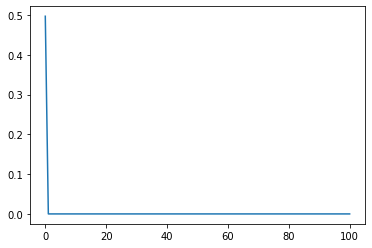

In [46]:
#loss array
#print(loss)
#print(np.shape(loss))
np_epochs = np.linspace(0,100,101)
plt.plot(np_epochs,loss)

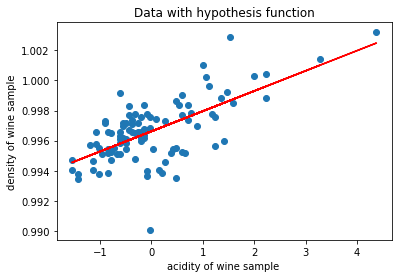

In [47]:
np_out_lr = np.ones(m)
for i in range(m):
    np_out_lr[i] = np.dot(np.transpose(weight),np_X[i])
plt.plot(np_X[:,0],np_out_lr, color='red')
plt.scatter(np_X[:,0],np_Y)
plt.title('Data with hypothesis function')
plt.xlabel('acidity of wine sample ')
plt.ylabel('density of wine sample')
plt.show()

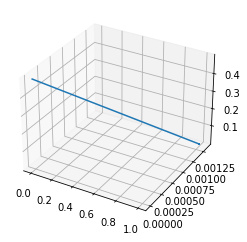

In [48]:
ax = plt.axes(projection='3d')
ax.plot3D(step_weight[:,1],step_weight[:,0],loss)

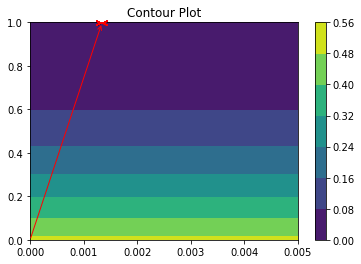

In [49]:
#getting contour plots 
theta_not = np.linspace(0,0.005,100)
theta_one = np.linspace(0,1,100)
cp_x , cp_y = np.meshgrid(theta_not,theta_one)
cp_z = np.zeros((100,100),dtype=float)
for i in range(100):
    for j in range(100):
        temp = np.array([[cp_x[i][j],cp_y[i][j]]],dtype = float).T
        cp_z[i][j]= loss_func(temp,np_X,np_Y,m)
cp=plt.contourf(cp_x,cp_y,cp_z)
plt.title('Contour Plot')
plt.colorbar(cp)
#print(step_weight)
for k in range(1,(np.shape(step_weight)[0])):
    plt.annotate('',xy=(step_weight[k][0],step_weight[k][1]),xytext=(step_weight[k-1][0],step_weight[k-1][1]),arrowprops={'arrowstyle': '->', 'color': 'r'})